# Information about data set

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. **Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.**

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. 

# Import Data from Drive [OK]

Please download the data from https://www.kaggle.com/mlg-ulb/creditcardfraud

Info about data: it is a CSV file, contains 31 features, the last feature is used to classify the transaction whether it is a fraud or not



In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
import os 


In [6]:
cwd = os.getcwd()
print (cwd)
!ls -lah

/content
total 20K
drwxr-xr-x 1 root root 4.0K Jun 10 17:48 .
drwxr-xr-x 1 root root 4.0K Jun 10 17:13 ..
drwxr-xr-x 1 root root 4.0K Jun  8 16:15 .config
drwx------ 4 root root 4.0K Jun 10 17:48 gdrive
drwxr-xr-x 1 root root 4.0K May 29 18:19 sample_data


In [0]:
os.chdir("/content/gdrive/My Drive/CreditCard")

In [8]:
!wc -l creditcard.csv


284808 creditcard.csv


In [9]:
cwd = os.getcwd()
print (cwd)
!ls -lah

/content/gdrive/My Drive/CreditCard
total 144M
-rw------- 1 root root 144M Feb 29 08:20 creditcard.csv


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = "/content/gdrive/My Drive/CreditCard/creditcard.csv"

creditcard = pd.read_csv(url)

creditcard.head()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# How to Deal with Imbalanced Dataset [OK]

In [0]:
print(creditcard.shape)

(284807, 31)


In [0]:
print(creditcard.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [0]:
## check null values 
print (f'Number if the records = {creditcard.shape[0]}')
pd.isnull(creditcard).sum()

In [0]:
creditcard["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [0]:
## the data is highly unbalanced
positive =  creditcard[creditcard.Class == 1]
positive_cnt = positive.shape[0]

negative =  creditcard[creditcard.Class == 0]
negative_cnt = negative.shape[0]

fruad_pct= positive_cnt / (positive_cnt  + negative_cnt )
print(f'records count = {creditcard.shape[0]} , fruad records = {positive_cnt} ,  the positive class (frauds) {round(fruad_pct*100,3)}%')


records count = 284807 , fruad records = 492 ,  the positive class (frauds) 0.173%


**Imbalanced Classes**

Most machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce error.

https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18


We explored 5 different methods for dealing with imbalanced datasets:
Change the performance metric


1.   Change the performance metric
2.   Change the algorithm
3.   Oversample minority class
4.   Undersample majority class
5.   Generate synthetic samples




In [0]:
from sklearn.model_selection import train_test_split
x = creditcard.drop('Class',axis=1)
y = creditcard.Class
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print('size of test dataset = {}, size of traing data = {}, percentage = {}%'.format(len(x_test),len(x_train),len(x_test)*100/(len(x_test) + len(x_train))))

size of test dataset = 56962, size of traing data = 227845, percentage = 20.000210668979342%


In [0]:
# Modeling the data as is
# Train model
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(solver='liblinear').fit(x_train, y_train)
 
# Checking accuracy
ACC_train_lr = model_lr.score(x_train, y_train)
ACC_test_lr = model_lr.score(x_test, y_test)
print(ACC_train_lr*100)
print(ACC_test_lr*100)

# Predict on training set
lr_pred = model_lr.predict(x_test)


# Checking unique values
predictions = pd.DataFrame(lr_pred)
predictions[0].value_counts()


99.90037086615902
99.89642217618764


0    56895
1       67
Name: 0, dtype: int64

high score !
but Let’s see what happens when we apply these F1 and recall scores to our logistic regression from above.

**1-Change the performance metric**

In [0]:
# 1-Change the performance metric

from sklearn.metrics import accuracy_score
print('accuracy_score= ', accuracy_score(y_test, lr_pred))

from sklearn.metrics import f1_score
# f1 score
print('f1_score= ', f1_score(y_test, lr_pred))

from sklearn.metrics import recall_score
# recall score
print('recall_score= ', recall_score(y_test, lr_pred))


accuracy_score=  0.9989642217618764
f1_score=  0.6549707602339181
recall_score=  0.5384615384615384


These scores don’t look quite so impressive

**2. Change the algorithm**

In [0]:
# 2. Change the algorithm
from sklearn.ensemble import RandomForestClassifier

# train model
model_rfc = RandomForestClassifier(n_estimators=10).fit(x_train, y_train)

# predict on test set
rfc_pred = model_rfc.predict(x_test)


0.8076923076923077

In [0]:
from sklearn.metrics import accuracy_score
print('accuracy_score= ', accuracy_score(y_test, rfc_pred))

from sklearn.metrics import f1_score
# f1 score
print('f1_score= ', f1_score(y_test, rfc_pred))

from sklearn.metrics import recall_score
# recall score
print('recall_score= ', recall_score(y_test, rfc_pred))

accuracy_score=  0.9995611109160493
f1_score=  0.8704663212435233
recall_score=  0.8076923076923077


While our accuracy score is slightly lower, both F1 and recall have increased as compared to logistic regression! It appears that for this specific problem, random forest may be a better choice of model.

**3. Resampling Techniques — Oversample minority class**

In [0]:
from sklearn.utils import resample

# Separate input features and target
y = creditcard.Class
X = creditcard.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.Class.value_counts()


1    213245
0    213245
Name: Class, dtype: int64

In [0]:
# trying logistic regression again with the balanced dataset
y_train = upsampled.Class
X_train = upsampled.drop('Class', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)
upsampled_pred = upsampled.predict(X_test)
   

0.8712121212121212

In [0]:
from sklearn.metrics import accuracy_score
print('accuracy_score= ', accuracy_score(y_test, upsampled_pred))

from sklearn.metrics import f1_score
# f1 score
print('f1_score= ', f1_score(y_test, upsampled_pred))

from sklearn.metrics import recall_score
# recall score
print('recall_score= ', recall_score(y_test, upsampled_pred))

accuracy_score=  0.9807589674447347
f1_score=  0.14375000000000002
recall_score=  0.8712121212121212


**4. Resampling techniques — Undersample majority class**

In [0]:
# still using our separated classes fraud and not_fraud from above

# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled.Class.value_counts()


1    360
0    360
Name: Class, dtype: int64

In [0]:
# trying logistic regression again with the undersampled dataset

y_train = downsampled.Class
X_train = downsampled.drop('Class', axis=1)

undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

undersampled_pred = undersampled.predict(X_test)


In [0]:
from sklearn.metrics import accuracy_score
print('accuracy_score= ', accuracy_score(y_test, undersampled_pred))

from sklearn.metrics import f1_score
# f1 score
print('f1_score= ', f1_score(y_test, undersampled_pred))

from sklearn.metrics import recall_score
# recall score
print('recall_score= ', recall_score(y_test, undersampled_pred))

accuracy_score=  0.9758574197354007
f1_score=  0.11710323574730355
recall_score=  0.8636363636363636


**5. Generate synthetic samples SMOTE**

In [0]:
from imblearn.over_sampling import SMOTE

# Separate input features and target
y = creditcard.Class
X = creditcard.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = smote.predict(X_test)


In [0]:
from sklearn.metrics import accuracy_score
print('accuracy_score= ', accuracy_score(y_test, smote_pred))

from sklearn.metrics import f1_score
# f1 score
print('f1_score= ', f1_score(y_test, smote_pred))

from sklearn.metrics import recall_score
# recall score
print('recall_score= ', recall_score(y_test, smote_pred))

accuracy_score=  0.9858571388444145
f1_score=  0.18461538461538463
recall_score=  0.8636363636363636


It appears for this particular dataset random forest and SMOTE are among the best of the options we tried here.

## 2-D Scatter Plot

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


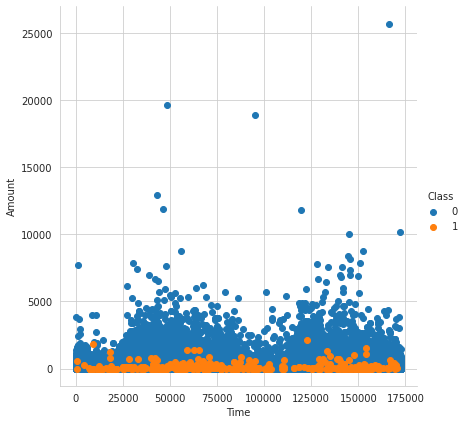

In [0]:
sns.set_style("whitegrid")
sns.FacetGrid(creditcard, hue="Class", size = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

Observations:

1. From the above two plots it is clearly visible that there are frauds only on the transactions which have transaction amount approximately less than 2500. Transactions which have transaction amount approximately above 2500 have no fraud.
2. As per with the time, the frauds in the transactions are evenly distributed throughout time.

## EDA Scatter plot

In [0]:
FilteredData = creditcard[['Time','Amount', 'Class']]

In [0]:
FilteredData

In [0]:
print(FilteredData.shape)

(284807, 3)


In [0]:
FilteredData["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

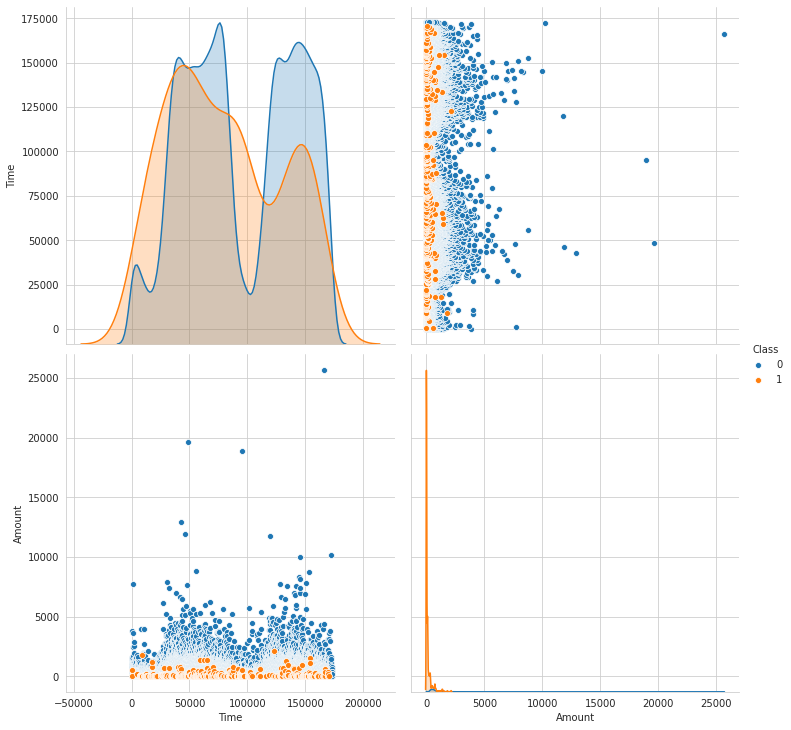

In [0]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(FilteredData, hue="Class", height=5);
plt.show()

In [0]:
countLess = FilteredData[FilteredData.Amount<2500]
countMore= FilteredData[FilteredData.Amount>=2500]
print(countLess.shape[0])
print(countMore.shape[0])

284358
449


In [0]:
## prcentage of trans with amount <2500 is 99.84
percentage = (countLess.shape[0]/FilteredData.shape[0])*100
percentage

99.84234938045763

Observations:

Now it has been calculated that there are 284357 transactions which has a transaction amount less than 2500. Means 99.84% of transactions have transaction amount less than 2500

In [0]:
FilteredData_fruad =FilteredData[FilteredData.Class==1]

countLess = FilteredData_fruad[FilteredData_fruad.Amount<2500]
countMore= FilteredData_fruad[FilteredData_fruad.Amount>=2500]
print(countLess.shape[0])
print(countMore.shape[0])

## prcentage of trans with amount <2500 is 99.84
percentage = (countLess.shape[0]/FilteredData_fruad.shape[0])*100
percentage

492
0


100.0

Observations:

Now the total number of fraud transactions in whole data are 492. It has been calculated that total number of fraud transactions in data where transaction amount is less than 2500 is also 492. Therefore, all 100% fraud transactions have transaction amount less than 2500 and there is no fraud transaction where transaction amount is more than 2500.  

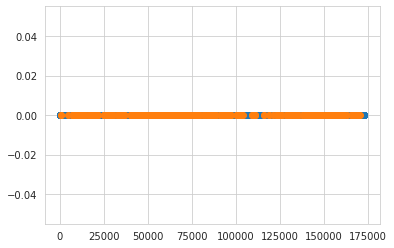

In [0]:
creditCard_genuine = FilteredData.loc[FilteredData["Class"] == 0]
creditCard_fraud = FilteredData.loc[FilteredData["Class"] == 1]

plt.plot(creditCard_genuine["Time"], np.zeros_like(creditCard_genuine["Time"]), "o")
plt.plot(creditCard_fraud["Time"], np.zeros_like(creditCard_fraud["Time"]), "o")

plt.show()

#X-axis: Time

Observations:

Fraud and genuine transactions are spread evenly thought time and there is no clear distinction.

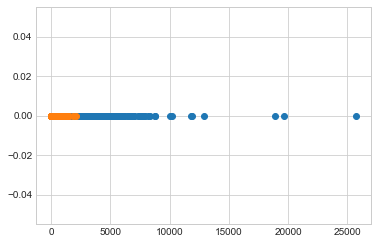

In [0]:
plt.plot(creditCard_genuine["Amount"], np.zeros_like(creditCard_genuine["Amount"]), "o")
plt.plot(creditCard_fraud["Amount"], np.zeros_like(creditCard_fraud["Amount"]), "o")

plt.show()
#X-axis: Amount

Observations:

It can clearly be observed from this 1D scatter plot that the fraud transactions are there only on the transaction amount less than 2500.

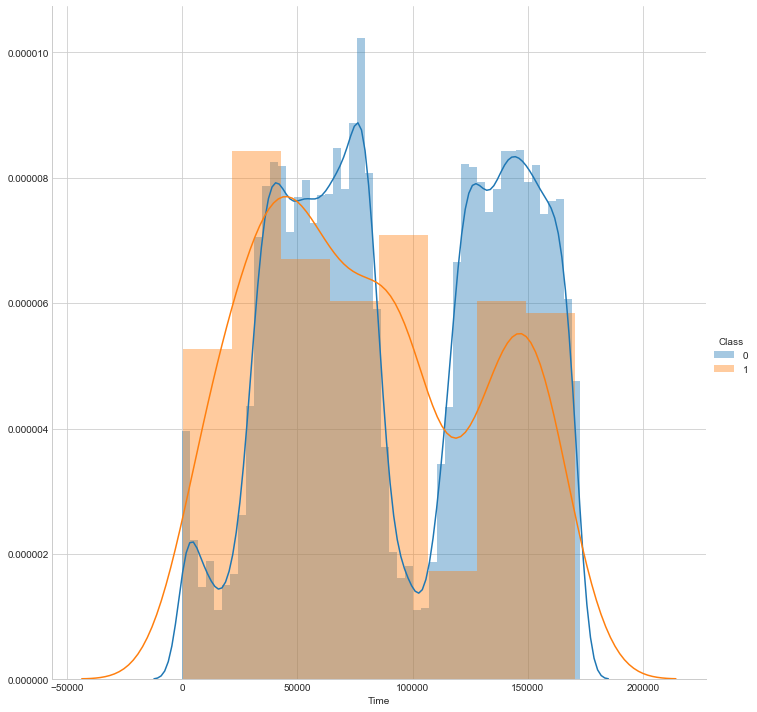

In [0]:
sns.FacetGrid(FilteredData, hue="Class", size=10).map(sns.distplot, "Time").add_legend()
plt.show()

Observations:

There is a heavy overlap of genuine and fraud transactions throughout the time and there is no clear distinction.

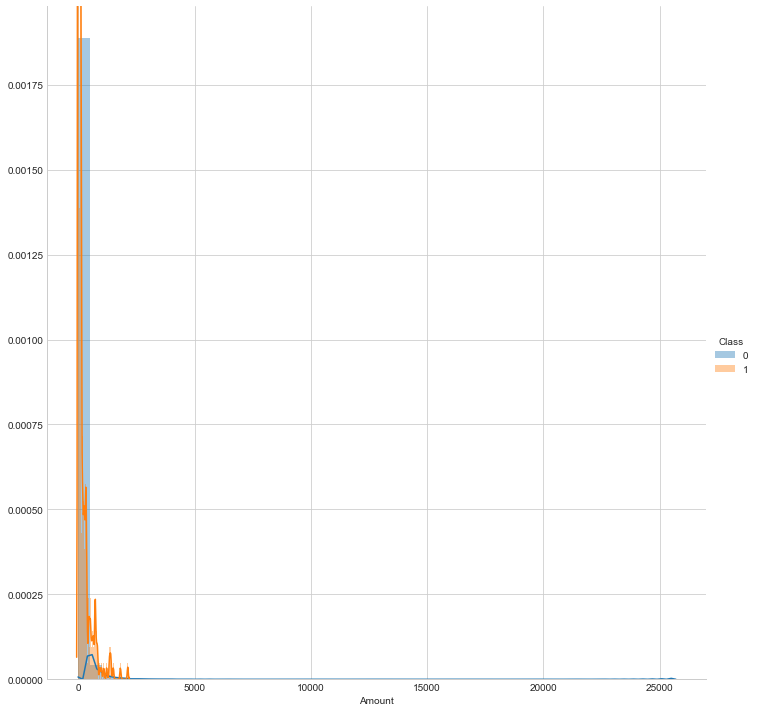

In [0]:
sns.FacetGrid(FilteredData, hue="Class", size=10).map(sns.distplot, "Amount").add_legend()
plt.show()

Observations:

Most of the transaction have amount less than 2500 approximately and all of the fraud transactions have transaction amount less than 2500. There is no fraud transaction of transaction amount greater than 2500.

**Hence, this is the best histogram we have**

pdf =  [9.98553406e-01 1.26401388e-03 1.26401388e-04 3.51114966e-05
 7.02229931e-06 3.51114966e-06 0.00000000e+00 7.02229931e-06
 0.00000000e+00 3.51114966e-06]


Counts = [3.88675874e-04 4.92003427e-07 4.92003427e-08 1.36667619e-08
 2.73335237e-09 1.36667619e-09 0.00000000e+00 2.73335237e-09
 0.00000000e+00 1.36667619e-09]


Bin edges =  [    0.     2569.116  5138.232  7707.348 10276.464 12845.58  15414.696
 17983.812 20552.928 23122.044 25691.16 ]


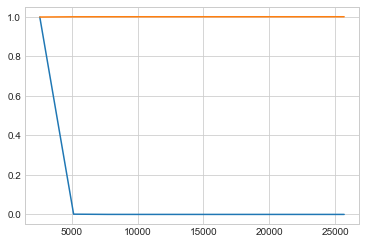

In [0]:
counts, bin_edges = np.histogram(FilteredData['Amount'], bins=10, density = True)
pdf = counts/(sum(counts))

print("pdf = ",pdf)
print("\n")
print("Counts =",counts)
print("\n")
print("Bin edges = ",bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

Observations:

Probability of the points having transaction amount approximately less than 2500 is 1, it means almost all of the transactions have transaction amount less than 2500 and cdf curve verifies this fact.

# EDA [OK]

In [29]:
creditcard.shape

(284807, 31)

In [0]:
creditcard.head()

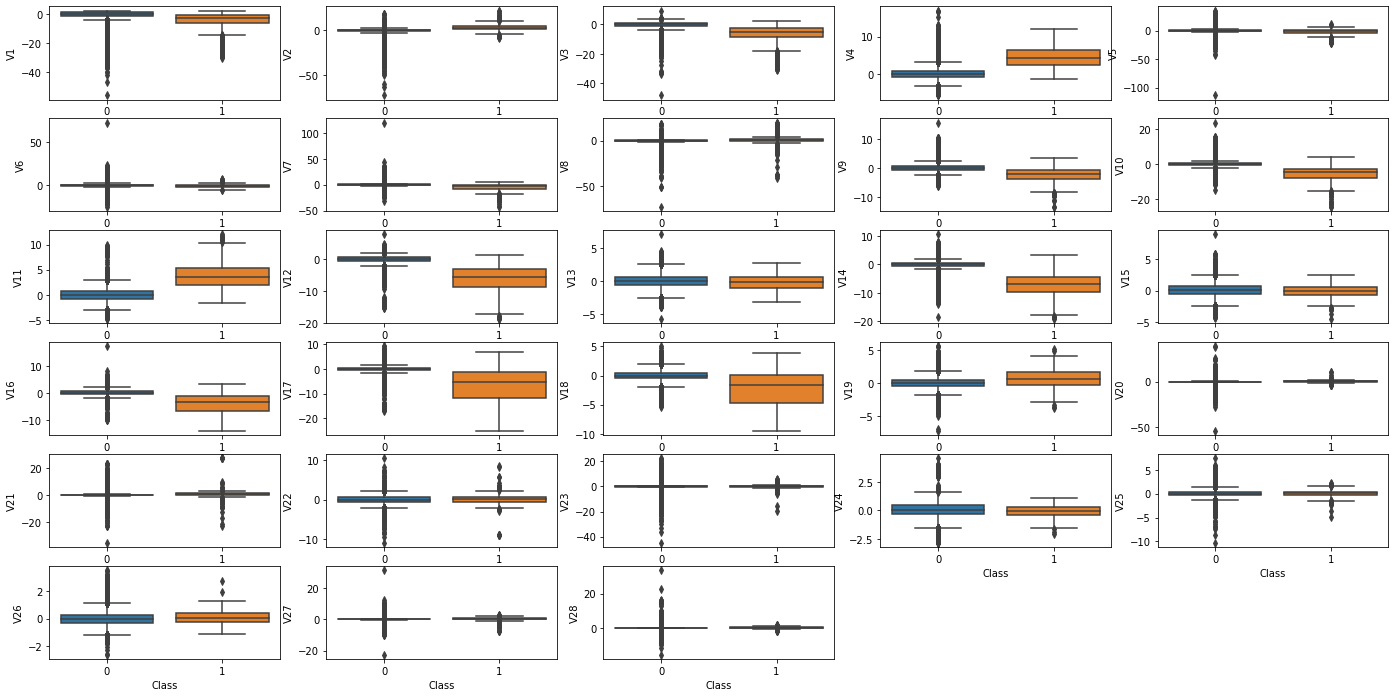

In [69]:
def foo(plot_rows,plot_col,i,col):
    plt.subplot(plot_rows,plot_col,i)
    sns.boxplot(x='Class',y=col,data=creditcard)

plt.figure(figsize=(24,12))
axs = [ foo(6,5,i,'V'+str(i)) for i in range(1,29)]


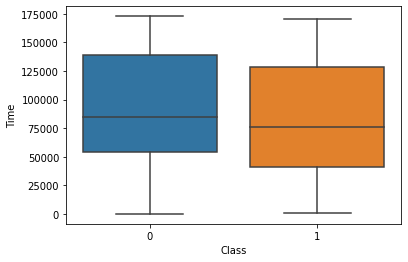

In [35]:
sns.boxplot(x = "Class", y = "Time", data = creditcard)
plt.show()

Observations:

By looking at the above box plot we can say that both fraud & genuine transactions occur throughout time and there is no distinction between them.

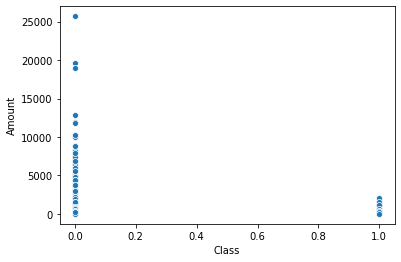

In [75]:
sns.scatterplot(x = "Class", y = "Amount", data = creditcard)
plt.show()

Observations:

From above box plot we can easily infer that there are no fraud transactions occur above the transaction amount of 3000. All of the fraud transactions have transaction amount less than 3000. However, there are many transactions which have a transaction amount greater than 3000 and all of them are genuine.

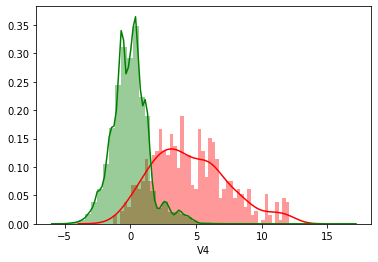

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
col='V4'

sns.distplot(creditcard[col][creditcard.Class == 1], bins=50, color='r')
sns.distplot(creditcard[col][creditcard.Class == 0], bins=50, color='g')
plt.show()

# Differnat classification on data as is (unbalanced) [OK]

In [16]:
from sklearn.model_selection import train_test_split
x = creditcard.drop('Class',axis=1)
y = creditcard.Class
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print('size of test dataset = {}, size of traing data = {}, percentage = {}%'.format(len(x_test),len(x_train),len(x_test)*100/(len(x_test) + len(x_train))))

size of test dataset = 56962, size of traing data = 227845, percentage = 20.000210668979342%


In [0]:
x

In [0]:
y

In [0]:
## logistic regression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)
ACC_train_lr = model_lr.score(x_train, y_train)
ACC_test_lr = model_lr.score(x_test, y_test)
print(ACC_train_lr*100)
print(ACC_test_lr*100)

In [20]:
##  Decision tree
from sklearn import tree
model_dt = tree.DecisionTreeClassifier()
model_dt.fit(x_train,y_train)
ACC_train_dt = model_dt.score(x_train,y_train)
ACC_test_dt = model_dt.score(x_test,y_test)
print(ACC_train_dt*100)
print(ACC_test_dt*100)

100.0
99.91573329588147


In [21]:
## Support Vector Machine
from sklearn.svm import SVC 
model_svm = SVC()
model_svm.fit(x_train, y_train)
ACC_train_svm = model_svm.score(x_train, y_train)
ACC_test_svm = model_svm.score(x_test, y_test)
print(ACC_train_svm*100)
print(ACC_test_svm*100)


99.82444205490575
99.83848881710614


In [22]:
## Random Forest 
from sklearn.ensemble import RandomForestClassifier 
model_rf = RandomForestClassifier()
model_rf.fit(x_train,y_train)
ACC_train_rf = model_rf.score(x_train, y_train)
ACC_test_rf = model_rf.score(x_test, y_test)
print(ACC_train_rf*100)
print(ACC_test_rf*100)

100.0
99.95786664794073


In [23]:
## Naive Bayse
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(x_train,y_train)
ACC_train_nb = model_nb.score(x_train,y_train)
ACC_test_nb = model_nb.score(x_test,y_test)
print(ACC_train_nb*100)
print(ACC_test_nb*100)

99.2486119949966
99.28022190232085


In [24]:
from prettytable import PrettyTable
t = PrettyTable(['Accuracy', 'Logistic (%)' , 'DT (%)' , 'SVM (%)' , 'RF (%)' , 'NB (%)'])
t.add_row(['Training', ACC_train_lr*100, ACC_train_dt*100, ACC_train_svm*100, ACC_train_rf*100 , ACC_train_nb*100])
t.add_row(['Testing', ACC_test_lr*100, ACC_test_dt*100, ACC_test_svm*100, ACC_test_rf*100 , ACC_test_nb*100])
print(t)

+----------+-------------------+-------------------+-------------------+-------------------+-------------------+
| Accuracy |    Logistic (%)   |       DT (%)      |      SVM (%)      |       RF (%)      |       NB (%)      |
+----------+-------------------+-------------------+-------------------+-------------------+-------------------+
| Training | 99.89861528670806 |       100.0       | 99.82444205490575 |       100.0       |  99.2486119949966 |
| Testing  | 99.90871107053826 | 99.91573329588147 | 99.83848881710614 | 99.95786664794073 | 99.28022190232085 |
+----------+-------------------+-------------------+-------------------+-------------------+-------------------+


In [0]:
# use differant performance metric on DT
lr_pred = model_lr.predict(x_test)
dt_pred = model_dt.predict(x_test)
svm_pred = model_svm.predict(x_test)
rf_pred = model_rf.predict(x_test)
nb_pred = model_nb.predict(x_test)

In [0]:
from sklearn.metrics import accuracy_score
lr_accuracy_score=  accuracy_score(y_test, lr_pred)
dt_accuracy_score=  accuracy_score(y_test, dt_pred)
svm_accuracy_score=  accuracy_score(y_test, svm_pred)
rf_accuracy_score=  accuracy_score(y_test, rf_pred)
nb_accuracy_score=  accuracy_score(y_test, nb_pred)

from sklearn.metrics import f1_score
# f1 score : F1 score reaches its best value at 1 and worst score at 0
lr_f1_score= f1_score(y_test, lr_pred)
dt_f1_score= f1_score(y_test, dt_pred)
svm_f1_score= f1_score(y_test, svm_pred)
rf_f1_score= f1_score(y_test, rf_pred)
nb_f1_score= f1_score(y_test, nb_pred)

from sklearn.metrics import recall_score
# recall score : The best value is 1 and the worst value is 0
lr_recall_score= recall_score(y_test, lr_pred)
dt_recall_score= recall_score(y_test, dt_pred)
svm_recall_score= recall_score(y_test, svm_pred)
rf_recall_score= recall_score(y_test, rf_pred)
nb_recall_score= recall_score(y_test, nb_pred)

In [0]:
from prettytable import PrettyTable
t2 = PrettyTable(['Accuracy', 'Logistic (%)' , 'DT (%)' , 'SVM (%)' , 'RF (%)' , 'NB (%)'])
t2.add_row(['accuracy_score', lr_accuracy_score*100, dt_accuracy_score*100, svm_accuracy_score*100, rf_accuracy_score*100 , nb_accuracy_score*100])
t2.add_row(['f1_score',       lr_f1_score*100, dt_f1_score*100, svm_f1_score*100, rf_f1_score*100 , nb_f1_score*100])
t2.add_row(['recall_score',   lr_recall_score*100, dt_recall_score*100, svm_recall_score*100, rf_recall_score*100 , nb_recall_score*100])
print(t2)

+----------------+-------------------+-------------------+-------------------+-------------------+--------------------+
|    Accuracy    |    Logistic (%)   |       DT (%)      |      SVM (%)      |       RF (%)      |       NB (%)       |
+----------------+-------------------+-------------------+-------------------+-------------------+--------------------+
| accuracy_score | 99.88939995084442 | 99.90344440153085 | 99.82971103542712 | 99.96313331694815 | 99.27495523331343  |
|    f1_score    | 68.65671641791045 | 74.17840375586854 |        0.0        | 88.26815642458101 | 23.376623376623375 |
|  recall_score  |  71.1340206185567 | 81.44329896907216 |        0.0        | 81.44329896907216 | 64.94845360824742  |
+----------------+-------------------+-------------------+-------------------+-------------------+--------------------+
